In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from platform import python_version
print(python_version())

3.9.13


In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.10.0'

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [6]:
# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units = 128, activation='relu'))

classifier.add(Dense(units=1, activation='sigmoid'))

In [7]:
# Compiling the CNN

classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                  metrics = ['accuracy'])

In [8]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Getting from directory

training_set = train_datagen.flow_from_directory('dogcat/cats_and_dogs_filtered/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')


test_set = test_datagen.flow_from_directory('dogcat/cats_and_dogs_filtered/validation',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
# Fit Generator is used when all the data/images cannot be put into the ram all at once
# It will break 1 Epoch into many steps

model = classifier.fit_generator(training_set, 
                                steps_per_epoch = 63,
                                epochs = 10,
                                validation_data = test_set,
                                validation_steps = 2000)

Epoch 1/10


C:\Users\USER\AppData\Local\Temp\ipykernel_22428\1897812290.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = classifier.fit_generator(training_set,


63/63 [==============================] - 12s 193ms/step - loss: 0.5574 - accuracy: 0.7080 - val_loss: 0.5807 - val_accuracy: 0.6900
Epoch 2/10
63/63 [==============================] - 9s 144ms/step - loss: 0.5382 - accuracy: 0.7295
Epoch 3/10
63/63 [==============================] - 9s 143ms/step - loss: 0.5380 - accuracy: 0.7310
Epoch 4/10
63/63 [==============================] - 9s 146ms/step - loss: 0.5021 - accuracy: 0.7600
Epoch 5/10
63/63 [==============================] - 10s 152ms/step - loss: 0.5006 - accuracy: 0.7600
Epoch 6/10
63/63 [==============================] - 9s 142ms/step - loss: 0.4940 - accuracy: 0.7605
Epoch 7/10
63/63 [==============================] - 9s 143ms/step - loss: 0.4826 - accuracy: 0.7765
Epoch 8/10
63/63 [==============================] - 10s 157ms/step - loss: 0.4982 - accuracy: 0.7630
Epoch 9/10
63/63 [==============================] - 13s 198ms/step - loss: 0.4702 - accuracy: 0.7845
Epoch 10/10
63/63 [==============================] - 10s 165ms/st

In [47]:
classifier.save("model.h5")
print('Model Saved to Disk')

Model Saved to Disk


In [48]:
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model

In [49]:
loaded_model = load_model('model.h5')

In [74]:
path ='D:/Computer Vision Notebooks/dogcat/cats_and_dogs_filtered/validation/dogs/dog.2014.jpg'

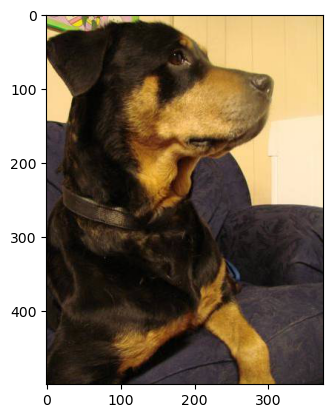

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

dog_image = mpimg.imread(path)

plt.imshow(dog_image)

In [76]:
test_image = image.load_img(path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

1/1 [==============================] - 0s 24ms/step


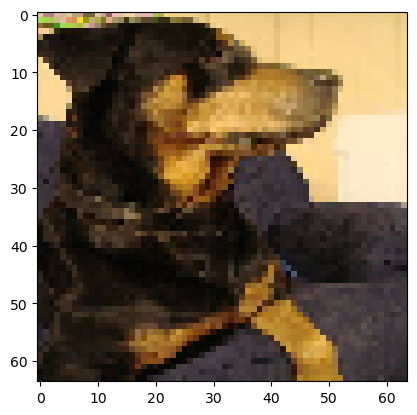

In [84]:
test_image = image.load_img(path, target_size = (64, 64))
#test_image = image.img_to_array(test_image)
plt.imshow(test_image)

In [77]:
result

array([[1.]], dtype=float32)

In [78]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [79]:
if round(result[0][0]) == 1:
    prediction = 'Its a Dog'
    print(prediction)
else:
    prediction = 'Its a Cat'
    print(prediction)

Its a Dog
